### Face Mask Detection

In [18]:
# 2. Move the kaggle.json to the correct folder
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions


In [19]:
!kaggle datasets download omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 77% 126M/163M [00:00<00:00, 1.31GB/s]
100% 163M/163M [00:00<00:00, 1.14GB/s]


In [20]:
import zipfile
zip=zipfile.ZipFile('/content/face-mask-dataset.zip','r')
zip.extractall('/content')
zip.close()

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout

In [25]:
def process(image,label):
  image=tf.cast(image/255.0,tf.float32)
  return image,label

Import the labraries

In [72]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [91]:
import matplotlib.image as mping

In [76]:
with_mask=os.listdir('/content/data/with_mask')
print(with_mask[0:5])
print(with_mask[-5:])

['with_mask_2682.jpg', 'with_mask_2207.jpg', 'with_mask_1971.jpg', 'with_mask_2059.jpg', 'with_mask_526.jpg']
['with_mask_2392.jpg', 'with_mask_2009.jpg', 'with_mask_2167.jpg', 'with_mask_713.jpg', 'with_mask_3272.jpg']


In [79]:
with_out_mask=os.listdir('/content/data/without_mask')
print(with_out_mask[:5])
print(with_out_mask[-5:])

['without_mask_1534.jpg', 'without_mask_2744.jpg', 'without_mask_2385.jpg', 'without_mask_598.jpg', 'without_mask_2229.jpg']
['without_mask_792.jpg', 'without_mask_2718.jpg', 'without_mask_1158.jpg', 'without_mask_1926.jpg', 'without_mask_2390.jpg']


In [81]:
print("No od mask images : ",len(with_mask))
print("No of without mask images : ",len(with_out_mask))

No od mask images :  3725
No of without mask images :  3828


Create labels for the 2 class of **images** **bold text**

With mask --> 1

without mask --> 0

In [82]:
with_mask_labels=[1]*len(with_mask)
without_mask_labels=[0]*len(with_out_mask)

In [84]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [86]:
print(len(with_mask))
len(with_out_mask)

3725


3828

In [87]:
labels=with_mask_labels+without_mask_labels

In [88]:
labels[0:5]

[1, 1, 1, 1, 1]

In [89]:
labels[-5:]

[0, 0, 0, 0, 0]

In [90]:
len(labels)

7553

***Displaying the images***

***Display with mask image and other with no mask image***

In [99]:
img=mping.imread('/content/data/with_mask/with_mask_1971.jpg')

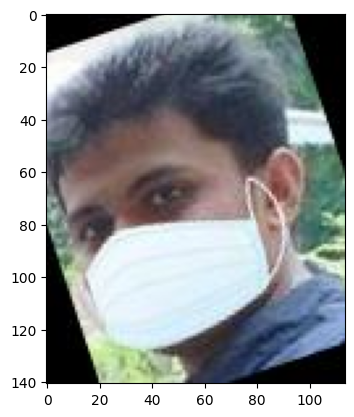

In [100]:
plt.imshow(img)

In [102]:
im=mping.imread('/content/data/without_mask/without_mask_1000.jpg')

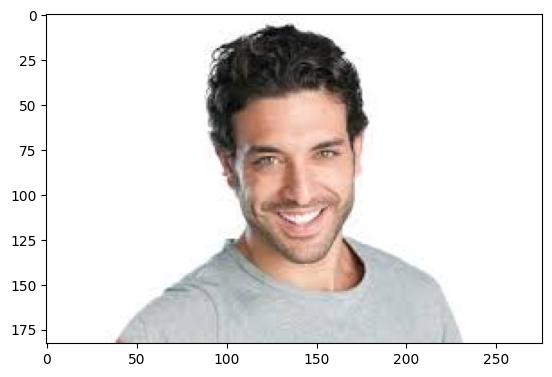

In [103]:
plt.imshow(im)

# ***Image processing ***

resize, convert to numpy array

# first convert them into array

In [192]:
with_mask_path='/content/data/with_mask/'
data=[]

for img_file in with_mask:
  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [127]:
path='/content/data/without_mask/'


for img in with_out_mask:
  image=Image.open(path+img)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

In [111]:
type(data)

list

In [112]:
len(data)

7553

array([[[235, 238, 243],
        [235, 238, 243],
        [235, 238, 243],
        ...,
        [235, 238, 243],
        [235, 238, 243],
        [235, 238, 243]],

       [[235, 238, 243],
        [235, 238, 243],
        [235, 238, 243],
        ...,
        [235, 238, 243],
        [235, 238, 243],
        [235, 238, 243]],

       [[235, 238, 243],
        [235, 238, 243],
        [235, 238, 243],
        ...,
        [235, 238, 243],
        [235, 238, 243],
        [235, 238, 243]],

       ...,

       [[235, 238, 243],
        [235, 238, 243],
        [235, 238, 243],
        ...,
        [235, 238, 243],
        [235, 238, 243],
        [235, 238, 243]],

       [[235, 238, 243],
        [235, 238, 243],
        [235, 238, 243],
        ...,
        [235, 238, 243],
        [235, 238, 243],
        [235, 238, 243]],

       [[235, 238, 243],
        [235, 238, 243],
        [235, 238, 243],
        ...,
        [235, 238, 243],
        [235, 238, 243],
        [235, 238, 243]]], dtype=uint8)
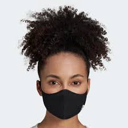

In [128]:
data[0]

In [114]:
type(data[0])

numpy.ndarray

In [129]:
data[0].shape

(128, 128, 3)

# Converting image list and label list into numpy array

In [130]:
x=np.array(data)
y=np.array(labels)

In [132]:
type(x)
type(y)

numpy.ndarray

In [134]:
x.shape

(7553, 128, 128, 3)

In [136]:
y.shape

(7553,)

# split the data into training and testing

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [143]:
x.shape

(7553, 128, 128, 3)

In [139]:
x_train.shape

(6042, 128, 128, 3)

In [140]:
x_test.shape

(1511, 128, 128, 3)

In [141]:
y_train.shape


(6042,)

In [142]:
y_test.shape

(1511,)

In [144]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [145]:
x_train_scaled[0]

array([[[0.88235294, 0.78823529, 0.65490196],
        [0.88235294, 0.78039216, 0.65098039],
        [0.82352941, 0.71764706, 0.58823529],
        ...,
        [0.99607843, 0.89803922, 0.76862745],
        [1.        , 0.92941176, 0.83529412],
        [0.97647059, 0.92156863, 0.84705882]],

       [[0.89019608, 0.79607843, 0.6627451 ],
        [0.88235294, 0.78431373, 0.65098039],
        [0.82352941, 0.71764706, 0.58823529],
        ...,
        [0.98039216, 0.88627451, 0.75294118],
        [0.98039216, 0.91372549, 0.81568627],
        [0.97254902, 0.92156863, 0.84705882]],

       [[0.8627451 , 0.76862745, 0.63529412],
        [0.8627451 , 0.76470588, 0.63137255],
        [0.8       , 0.69411765, 0.56470588],
        ...,
        [0.98039216, 0.88627451, 0.75686275],
        [0.98039216, 0.92156863, 0.82745098],
        [0.97647059, 0.93333333, 0.8627451 ]],

       ...,

       [[0.03921569, 0.28627451, 0.62745098],
        [0.05882353, 0.2627451 , 0.57647059],
        [0.13333333, 0

# Building CNN layer

In [177]:
no_of_labels=2
model=Sequential([
    Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),


    Conv2D(64,kernel_size=(3,3),activation='relu',padding='valid'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128,activation='relu'), # rectified linear unit
    Dropout(0.002),
    Dense(64,activation='relu'),
    Dropout(0.0002),
    Dense(32,activation='relu'),
    Dropout(0.00002),
    Dense(no_of_labels,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [178]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [179]:
history=model.fit(x_train_scaled,y_train,epochs=5,validation_data=(x_test_scaled,y_test),validation_split=0.1)

Epoch 1/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.8084 - loss: 0.4347 - val_accuracy: 0.9060 - val_loss: 0.2196
Epoch 2/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9242 - loss: 0.1957 - val_accuracy: 0.9166 - val_loss: 0.1983
Epoch 3/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9577 - loss: 0.1234 - val_accuracy: 0.9318 - val_loss: 0.1798
Epoch 4/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9645 - loss: 0.0917 - val_accuracy: 0.9338 - val_loss: 0.2187
Epoch 5/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9808 - loss: 0.0583 - val_accuracy: 0.9378 - val_loss: 0.2137


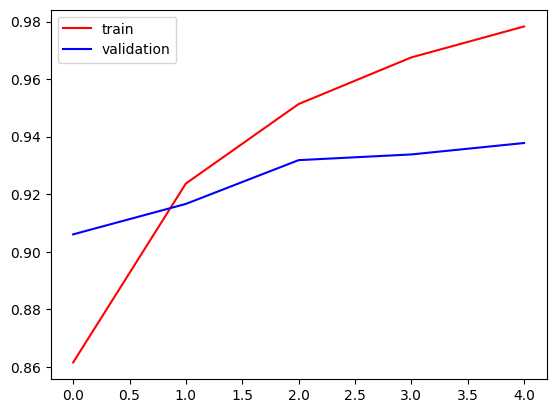

In [180]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

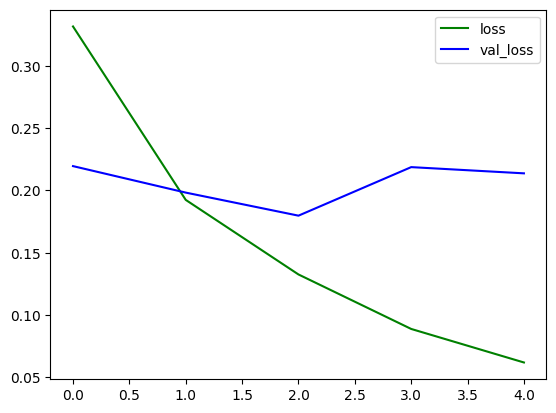

In [181]:
plt.plot(history.history['loss'],color='green',label='loss')
plt.plot(history.history['val_loss'],color='blue',label='val_loss')
plt.legend()
plt.show()

In [182]:
loss,acc=model.evaluate(x_test_scaled,y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9365 - loss: 0.2168


In [185]:
acc

0.9377895593643188

In [186]:
loss

0.2137499302625656

paste the path of the image : /content/business-woman-wearing-a-mask-f1.jpg


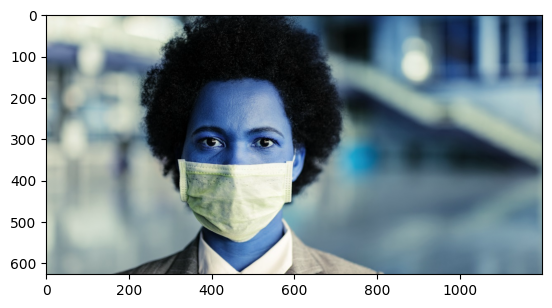

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.2852094  0.75090533]]
1
The person in the image is wearing the mask


In [190]:
input_image=input("paste the path of the image : ")
img1=cv2.imread(input_image)
plt.imshow(img1)
plt.show()
img1=cv2.resize(img1,(128,128))
img_scaled=img1/255.0
reshaped=img_scaled.reshape(1,128,128,3)

input_prediction=model.predict(reshaped)
print(input_prediction)
input_label=np.argmax(input_prediction)
print(input_label)

if input_label==1:
  print("The person in the image is wearing the mask")
else:
  print("The person in the image is not wearing the mask")

In [191]:
input_prediction

array([[0.2852094 , 0.75090533]], dtype=float32)

paste the path of the image : /content/data/without_mask/without_mask_1000.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0.87608194 0.49975634]]


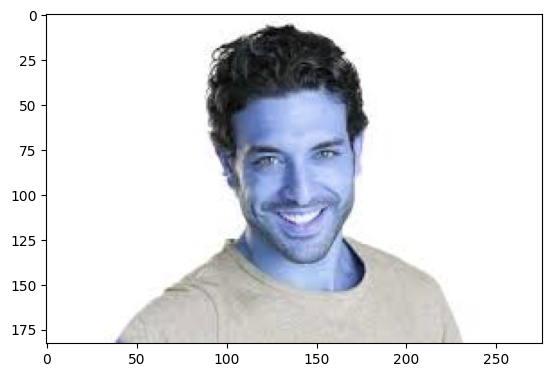

In [193]:
input=input("paste the path of the image : ")
img=cv2.imread(input)
plt.imshow(img)
img1=cv2.resize(img,(128,128))
img_scaled=img1/255.0
reshaped=img_scaled.reshape(1,128,128,3)

input_prediction=model.predict(reshaped)
print(input_prediction)

In [195]:
np.argmax(input_prediction)

np.int64(0)